In [41]:
def svcDS(task='taskname', trainList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10'], predictList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']):
    from sklearn.svm import LinearSVC
    import numpy as np
    import reshape
    import plotFW
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import cross_validate
    from sklearn import metrics
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
    clf = LinearSVC()
    cvTable=[]
    accTable=[]
    for i in trainList:
        #Load task FC
        taskFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/' +task+ '/' +i+ '_parcel_corrmat.mat')
        #Load rest
        restFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/' +i+ '_parcel_corrmat.mat')
        #Create a training dataset targets 1/0 ==task/rest, chunk=#days
        x_train=np.concatenate((taskFC, restFC))
        taskSize=taskFC.shape[0]
        restSize=restFC.shape[0]
        t = np.ones(taskSize, dtype = int)
        r=np.zeros(restSize, dtype=int)
        y_train = np.concatenate((t,r))
        clf.fit(x_train, y_train)
        #Cross validation
        CVscores=cross_val_score(clf, x_train, y_train, cv=taskSize)
        #Obtain feature weights within folds
        folds=cross_validate(clf, x_train, y_train, cv=taskSize, return_estimator=True)
        plotFW.fwFolds(folds, 'DS', task, i)
        #Obtain coefficients (feature weights)
        coef = clf.coef_
        #Plot feature weights
        #plotFW.feature_plots(coef, 'DS', task, i)
        #plotFW.saveFW(coef, 'DS', task, i)
        acc_scores_per_task=[]
        #Lets loop through all scenerios for sub and task of interest
        """
        for j in predictList:
            #Load testing set
            test_taskFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/'+task+'/'+j+'_parcel_corrmat.mat')
            #and all rest files
            test_restFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/'+j+'_parcel_corrmat.mat')
            #Create testing dataset
            x_test=np.concatenate((test_taskFC, test_restFC))
            ttaskSize=test_taskFC.shape[0]
            trestSize=test_restFC.shape[0]
            tt = np.ones(ttaskSize, dtype = int)
            tr=np.zeros(trestSize, dtype=int)
            y_test = np.concatenate((tt,tr))
            p=clf.predict(x_test)
            # Use score method to get accuracy of model
            score = clf.score(x_test, y_test)
            acc_scores_per_task.append(score)
            #construct a confusion matrix
            cm = metrics.confusion_matrix(y_test, p)
            plt.figure(figsize=(9,9))
            sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
            plt.ylabel('Actual label');
            plt.xlabel('Predicted label');
            all_sample_title = 'Accuracy Score: {0}'.format(score)
            plt.title(all_sample_title, size = 15);
            plt.savefig("/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/images/SVC/cm/DS/" +task+ '_train' +i+ '_test_' +j+ '.png')
        tmp_df=pd.DataFrame({'Test_variables':predictList, i:acc_scores_per_task}).set_index('Test_variables')
        accTable.append(tmp_df)
        cv_tmp_df=pd.DataFrame({i:CVscores})
        cvTable.append(cv_tmp_df)
    accTable=pd.concat(accTable, axis=1)
    accTable.to_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/DS/'+task+'_accTable_diff_sub.csv')
    cvTable=pd.concat(cvTable, axis=1)
    cvTable.to_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/DS/'+task+'_cvTable_folds.csv')

"""

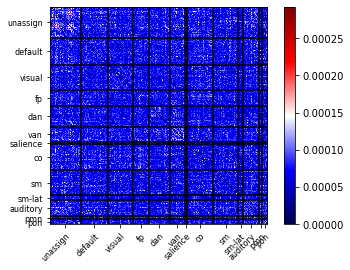

FileNotFoundError: [Errno 2] No such file or directory: '/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/images/SVC/fw/DS/fwSD_Folds/mem_MSC01.png'

In [42]:
taskName=['mem','mixed','motor']
for t in taskName:
    svcDS(t)

In [4]:
def svcSS(subid='sub', trainList=['mem','mixed','motor'], predictList=['mem','mixed','motor']):
    from sklearn.svm import LinearSVC
    import numpy as np
    import reshape
    import pandas as pd
    import matplotlib.pyplot as plt
    import plotFW
    import seaborn as sns
    from sklearn.model_selection import cross_val_score
    from sklearn import metrics
    from sklearn.model_selection import train_test_split
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
    clf = LinearSVC()
    cvTable=[]
    accTable=[]
    for i in trainList:
        #Load task FC
        taskFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/' +i+ '/' +subid+ '_parcel_corrmat.mat')
        #Load rest
        restFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/' +subid+ '_parcel_corrmat.mat')
        #because were within subject lets save 2 days of rest randomely to use for the testing set
        train_rest, test_rest = train_test_split(restFC, test_size=.2)
        #to match training task set with training rest set
        train_task, trash = train_test_split(taskFC, test_size=.2)
        #Create a training dataset targets 1/0 ==task/rest, chunk=#days
        x_train=np.concatenate((train_task, train_rest))
        taskSize=train_task.shape[0]
        restSize=train_rest.shape[0]
        t = np.ones(taskSize, dtype = int)
        r=np.zeros(restSize, dtype=int)
        y_train = np.concatenate((t,r))
        clf.fit(x_train, y_train)
        CVscores=cross_val_score(clf, x_train, y_train, cv=taskSize)
        coef = clf.coef_
        #Plot feature weights
        plotFW.feature_plots(coef, 'SS', i, subid)
        acc_scores_per_task=[]
        #Lets loop through all scenerios for sub and task of interest
        for j in predictList:
            #Load testing set
            test_taskFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/'+j+'/'+subid+'_parcel_corrmat.mat')
            x_test=np.concatenate((test_taskFC, test_rest))
            #Create testing dataset
            ttaskSize=test_taskFC.shape[0]
            trestSize=test_rest.shape[0]
            tt = np.ones(ttaskSize, dtype = int)
            tr=np.zeros(trestSize, dtype=int)
            y_test = np.concatenate((tt,tr))
            p=clf.predict(x_test)
            # Use score method to get accuracy of model
            score = clf.score(x_test, y_test)
            acc_scores_per_task.append(score)
            #construct a confusion matrix
            cm = metrics.confusion_matrix(y_test, p)
            plt.figure(figsize=(9,9))
            sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
            plt.ylabel('Actual label');
            plt.xlabel('Predicted label');
            all_sample_title = 'Accuracy Score: {0}'.format(score)
            plt.title(all_sample_title, size = 15);
            plt.savefig("/Users/aporter1350/Desktop//MSC_Alexis/analysis/output/images/SVC/cm/SS/" +i+ '_train' +j+ '_test_' +subid+ '.png')
        tmp_df=pd.DataFrame({'Test_variables':predictList, i:acc_scores_per_task}).set_index('Test_variables')
        accTable.append(tmp_df)
        cv_tmp_df=pd.DataFrame({i:CVscores})
        cvTable.append(cv_tmp_df)
    accTable=pd.concat(accTable, axis=1)
    accTable.to_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/SS/'+subid+'_accTable_same_sub.csv')
    cvTable=pd.concat(cvTable, axis=1)
    cvTable.to_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/SS/'+subid+'_cvTable_folds.csv')




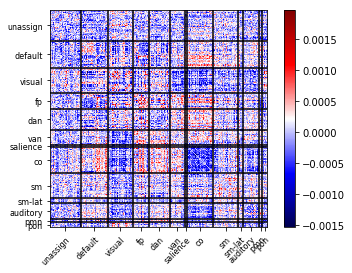

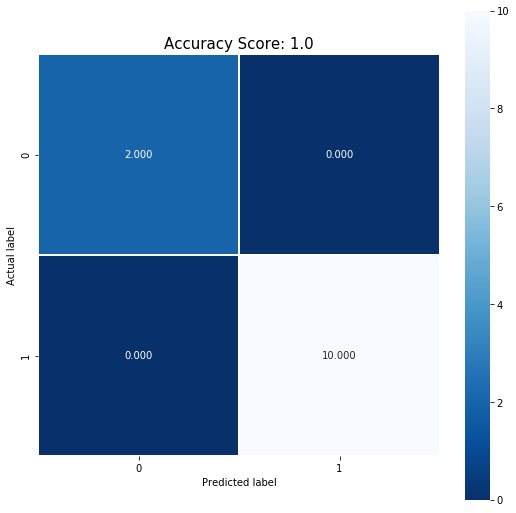

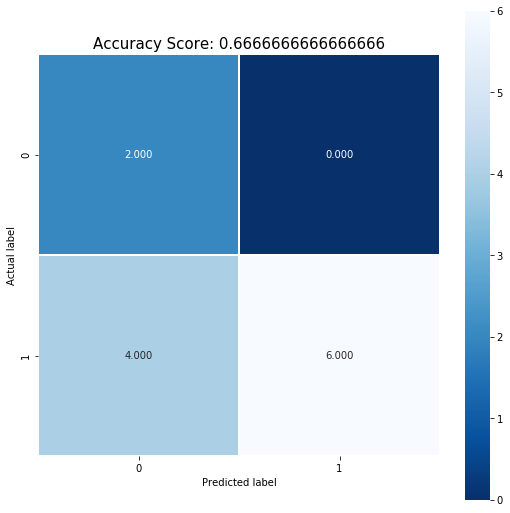

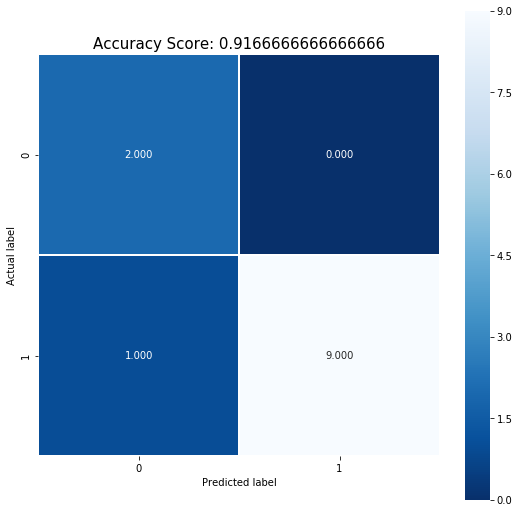

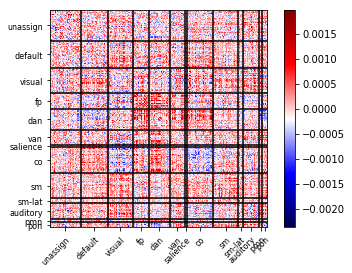

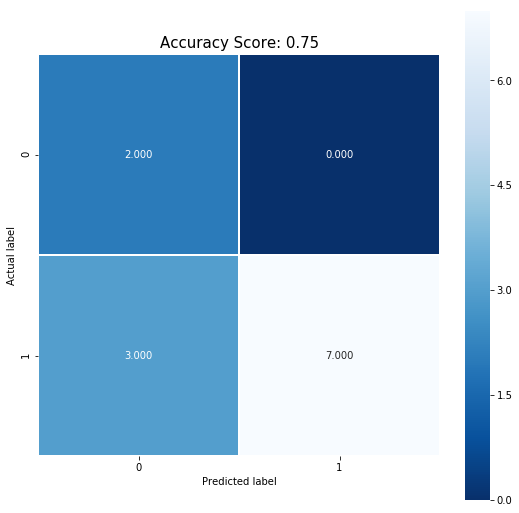

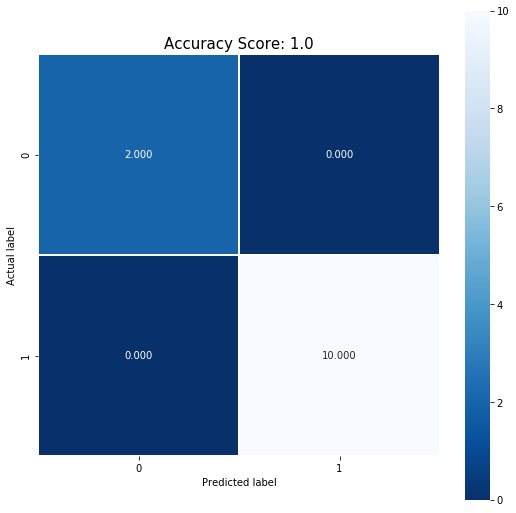

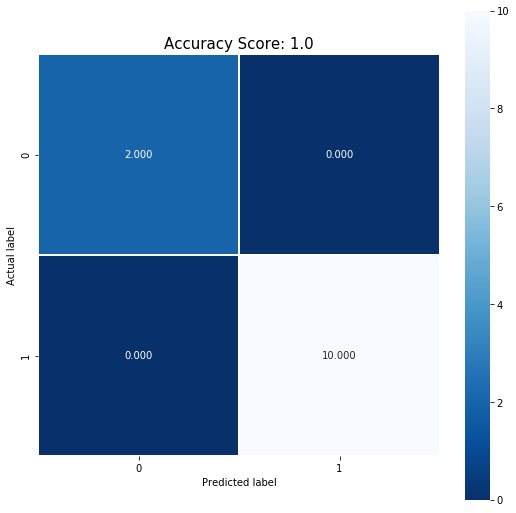

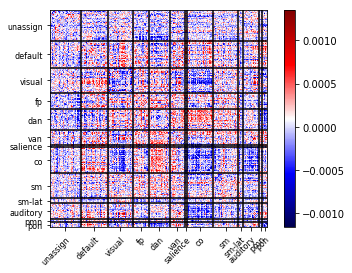

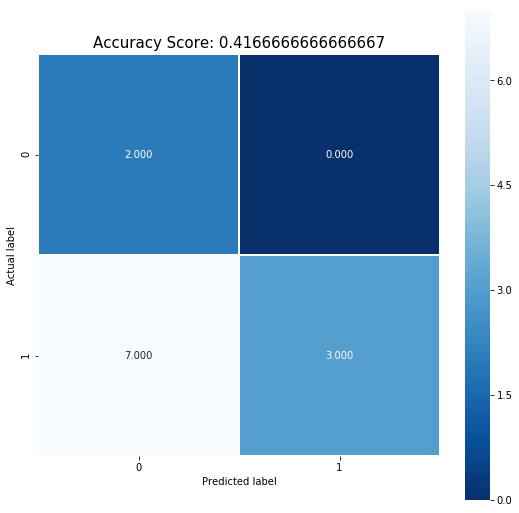

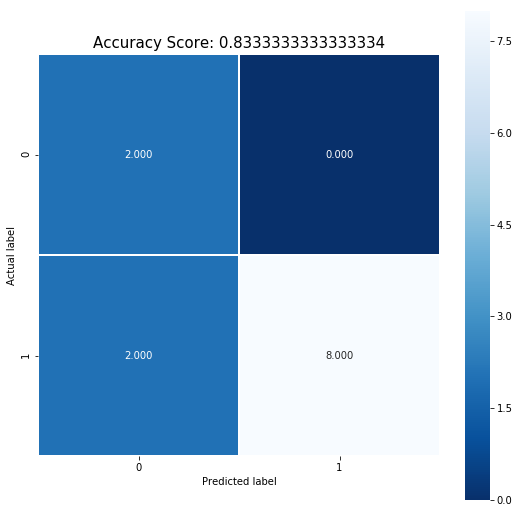

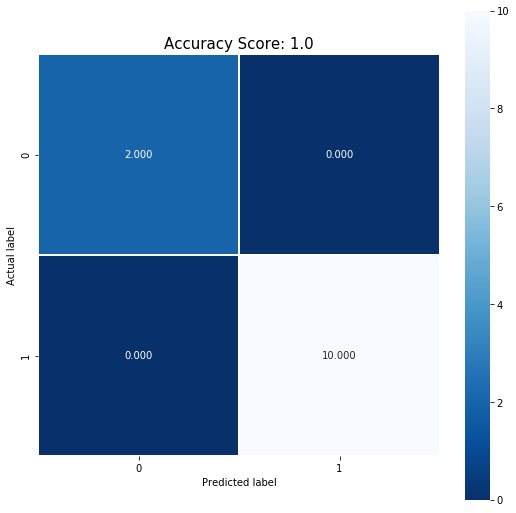

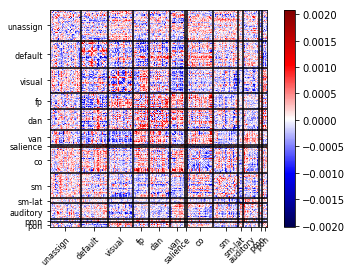

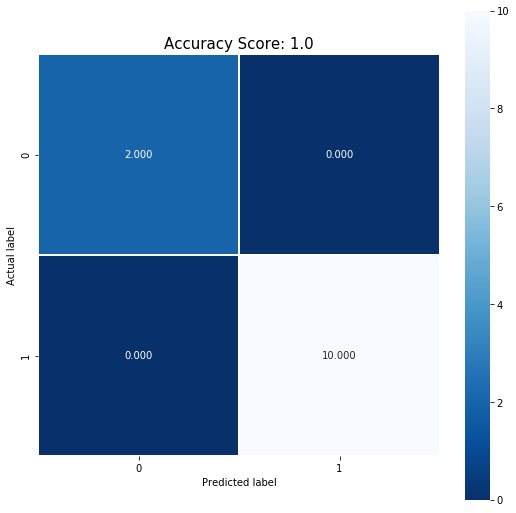

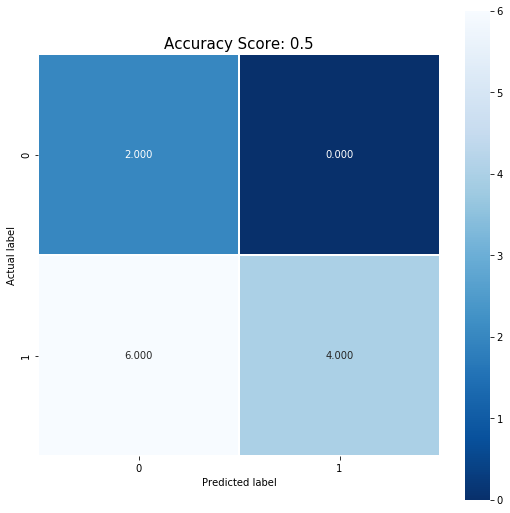

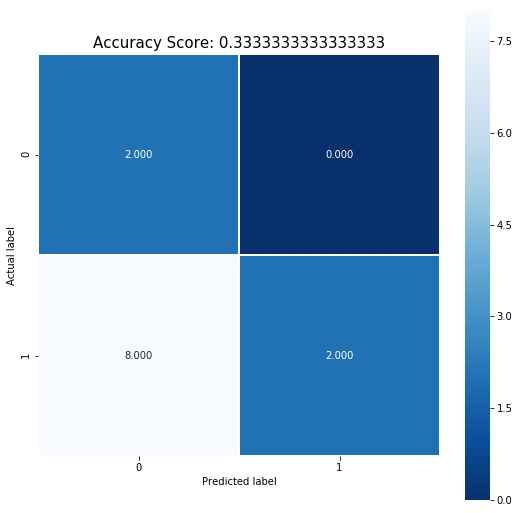

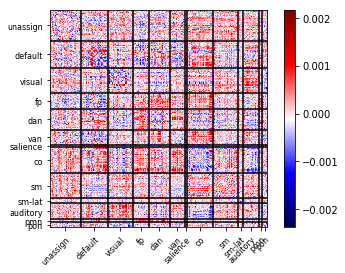

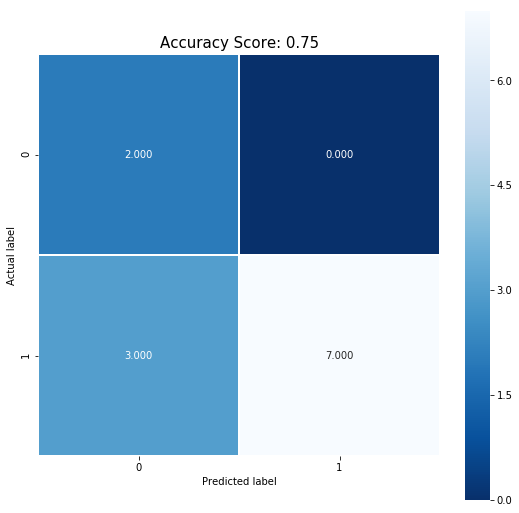

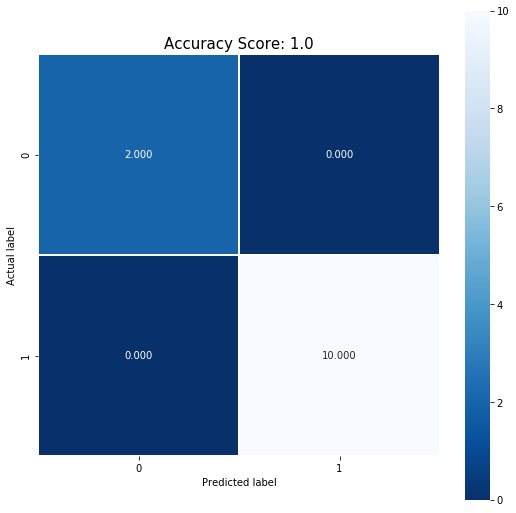

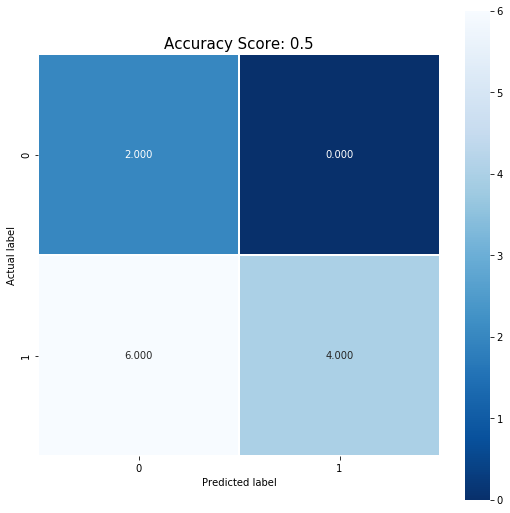

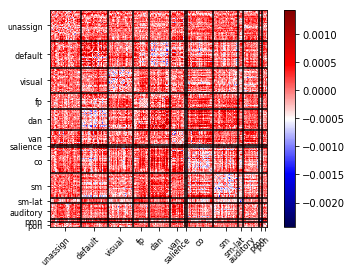

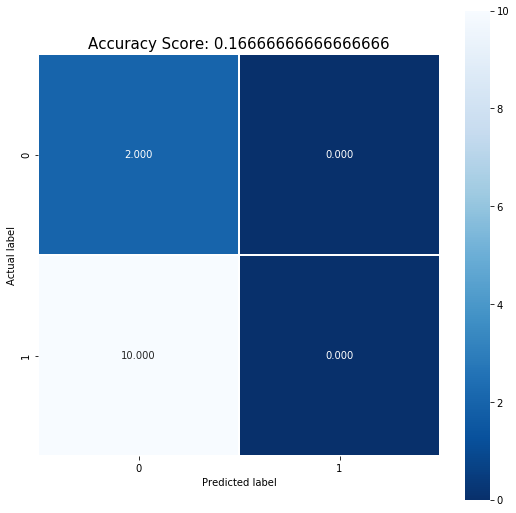

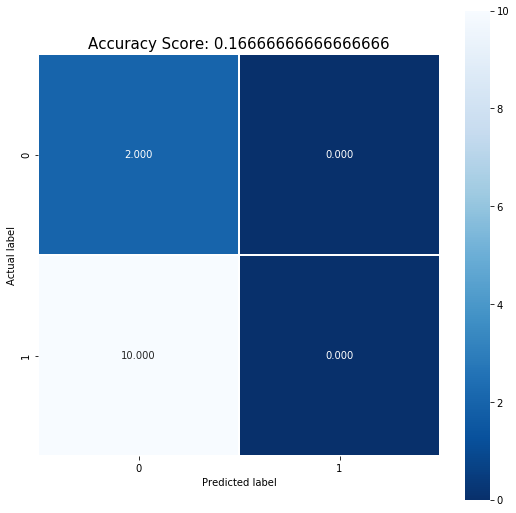

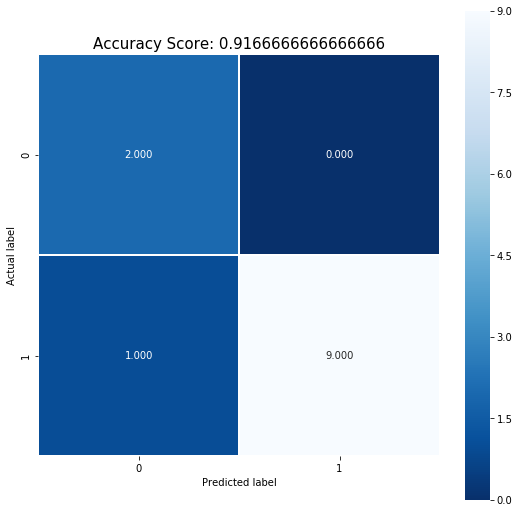

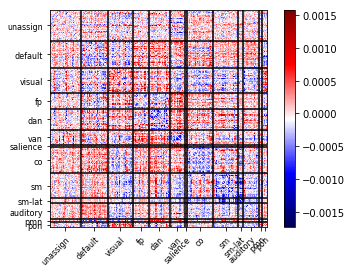

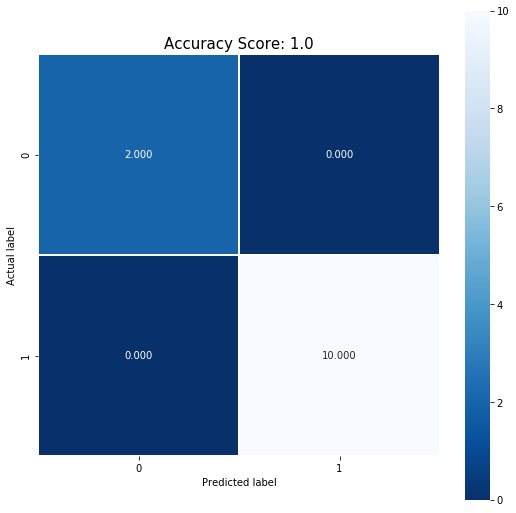

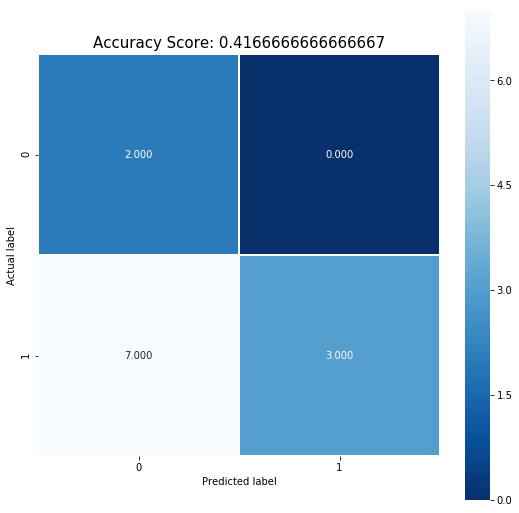

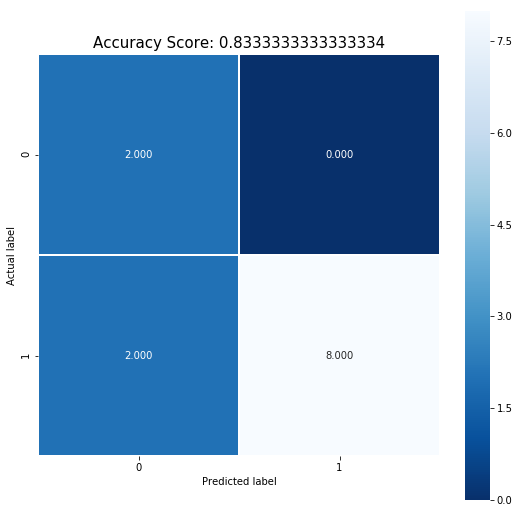

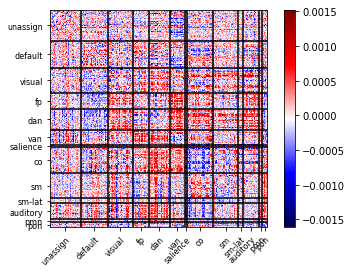

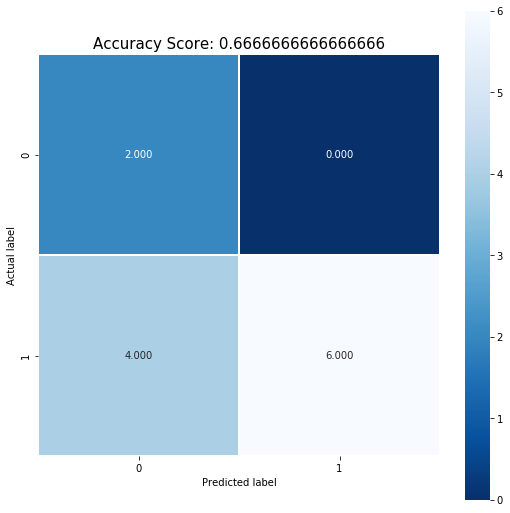

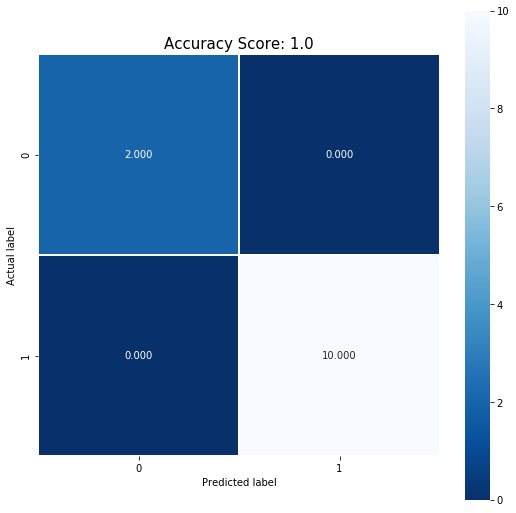

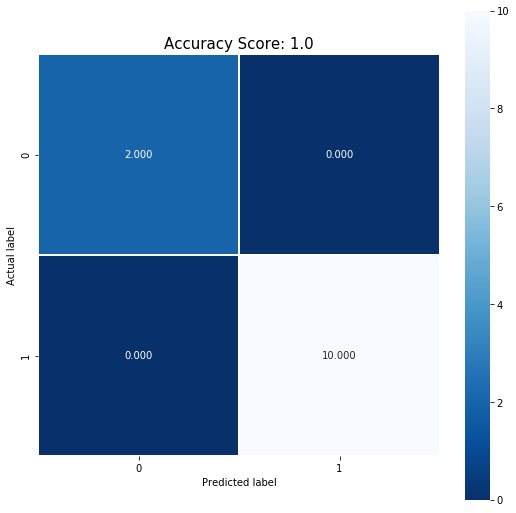

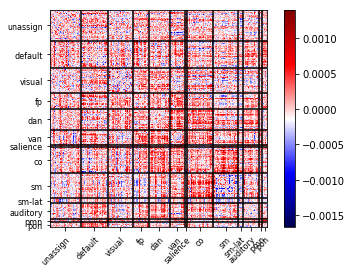

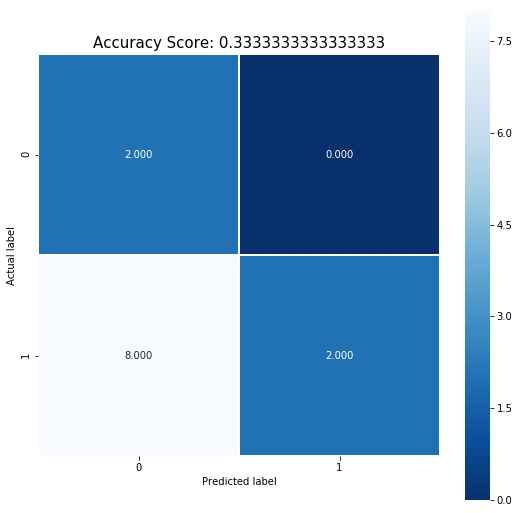

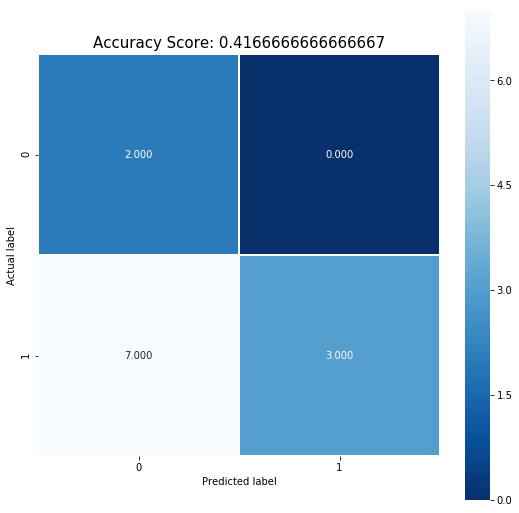

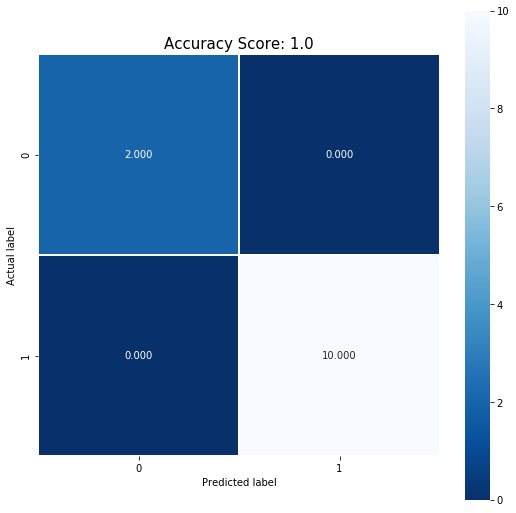

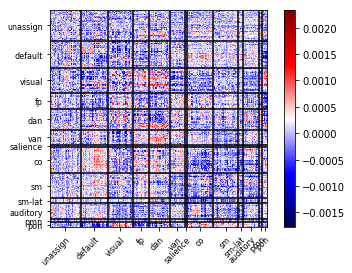

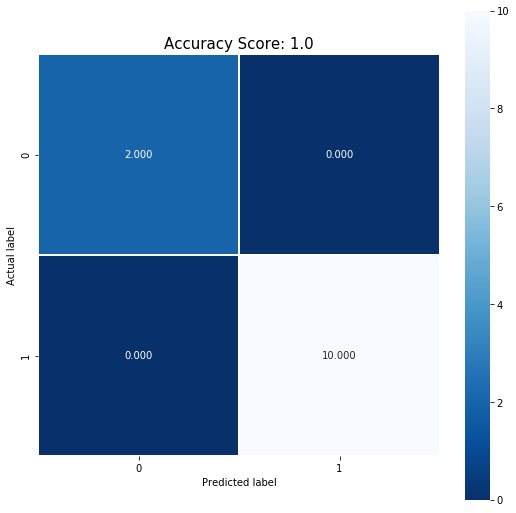

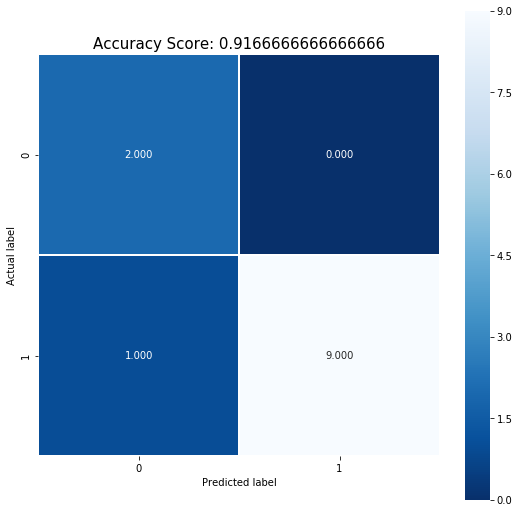

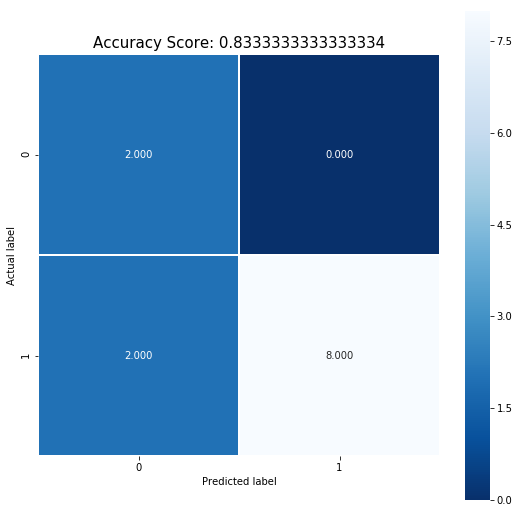

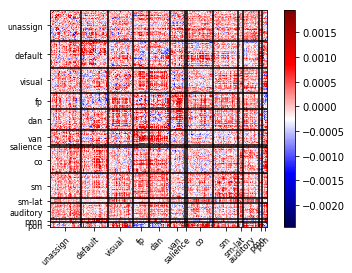

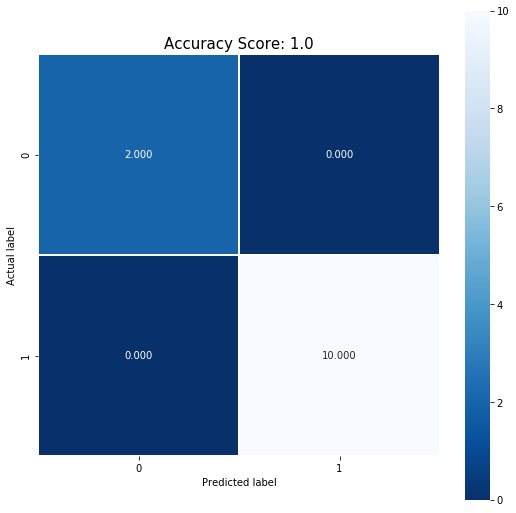

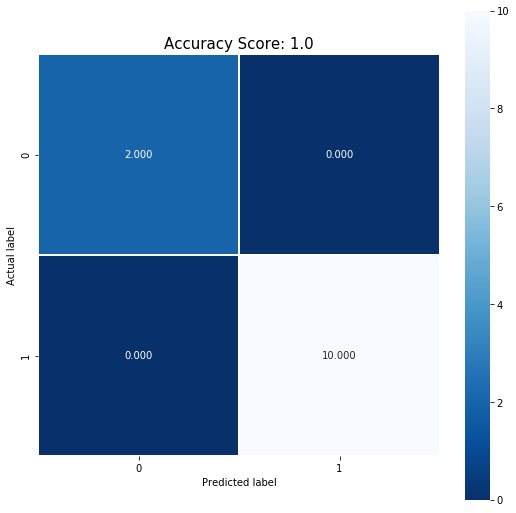

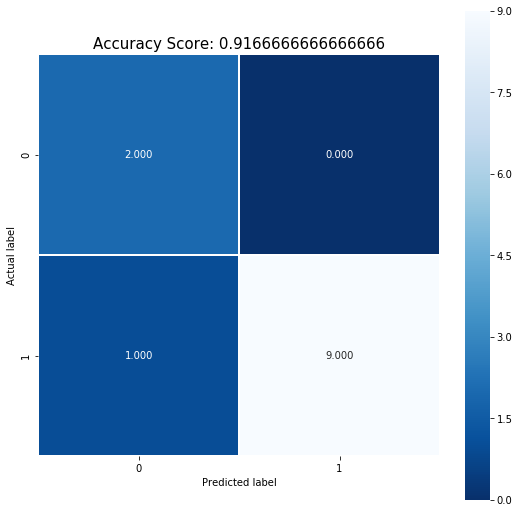

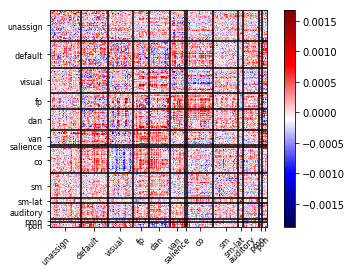

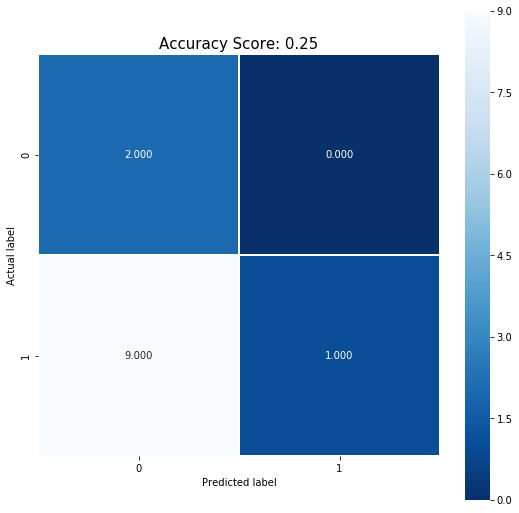

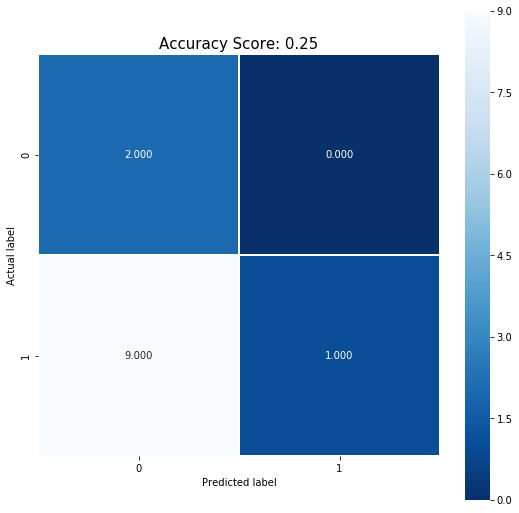

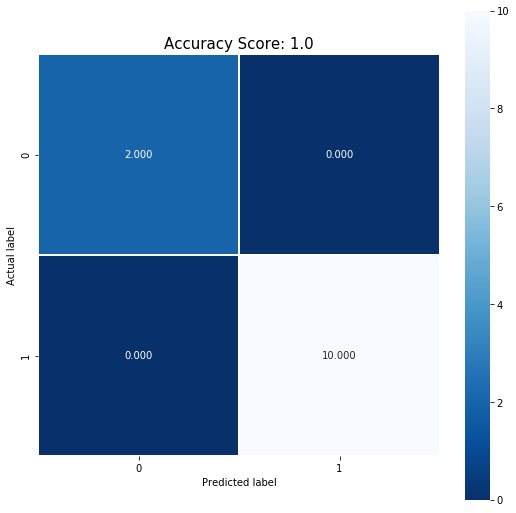

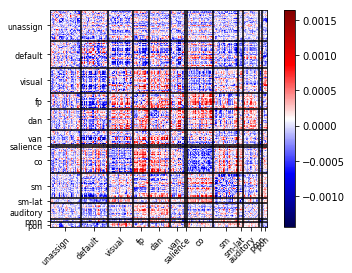

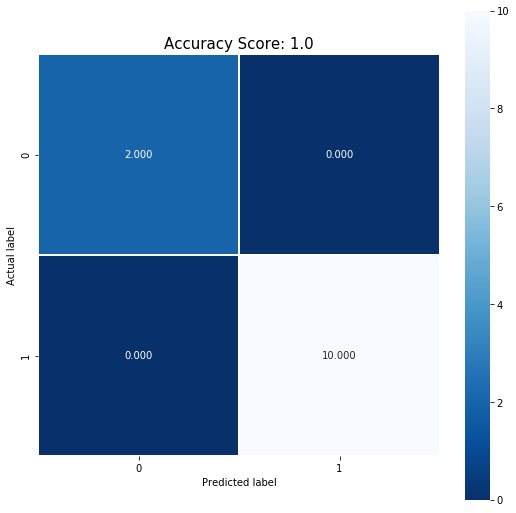

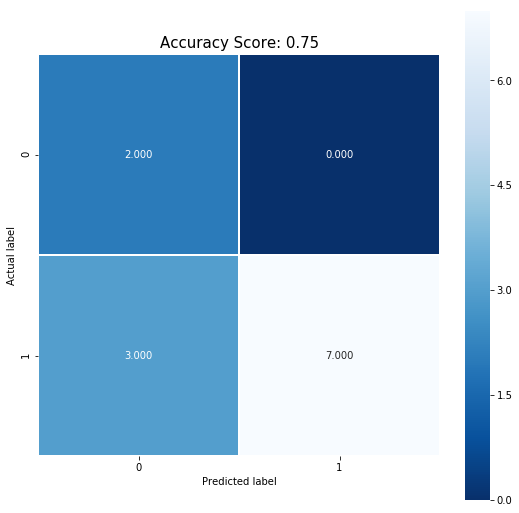

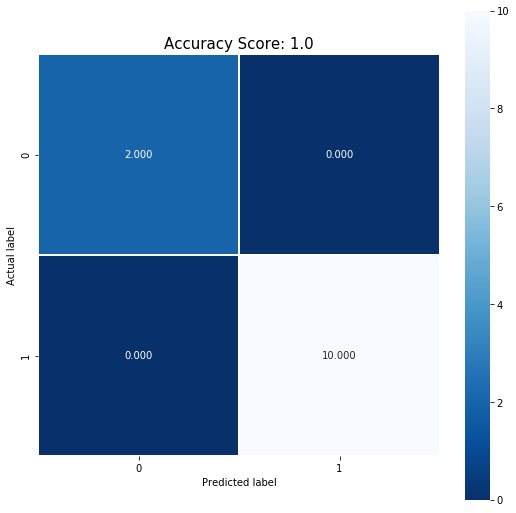

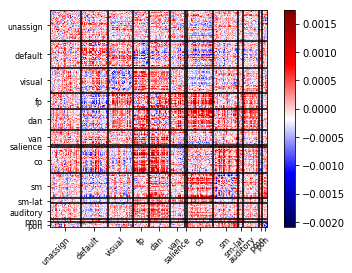

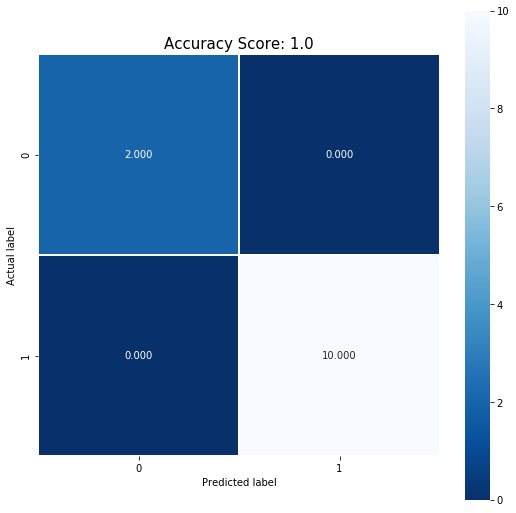

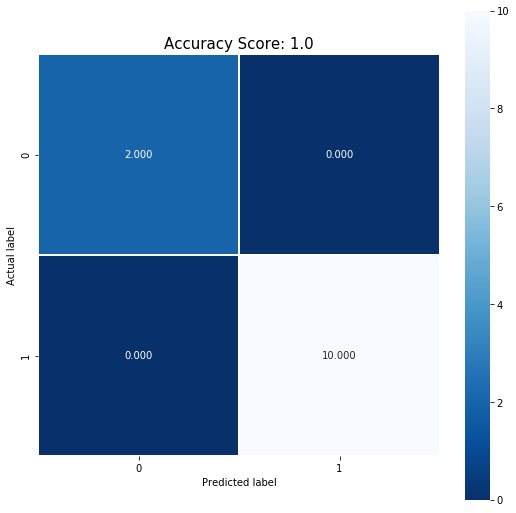

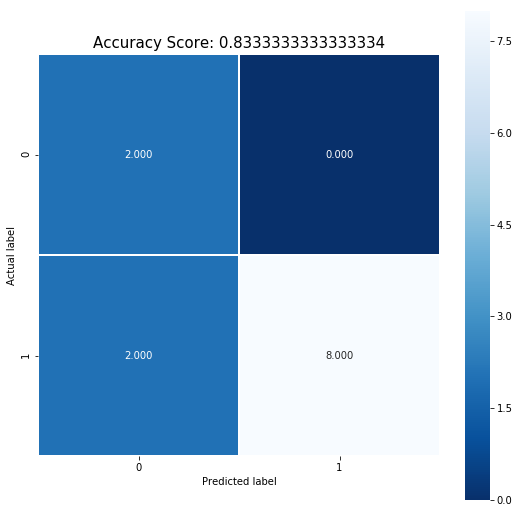

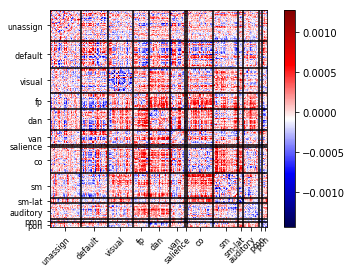

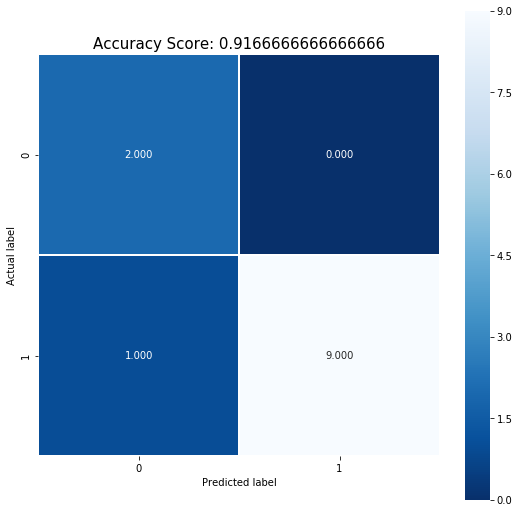

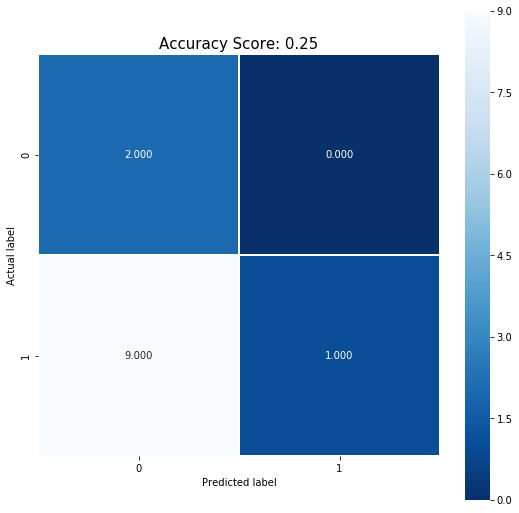

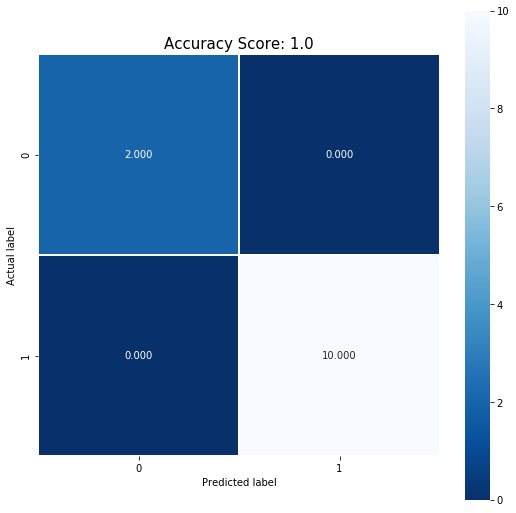

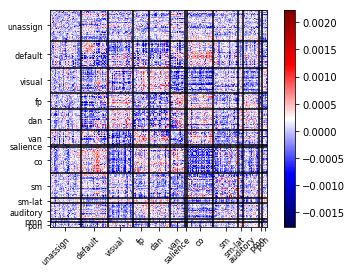

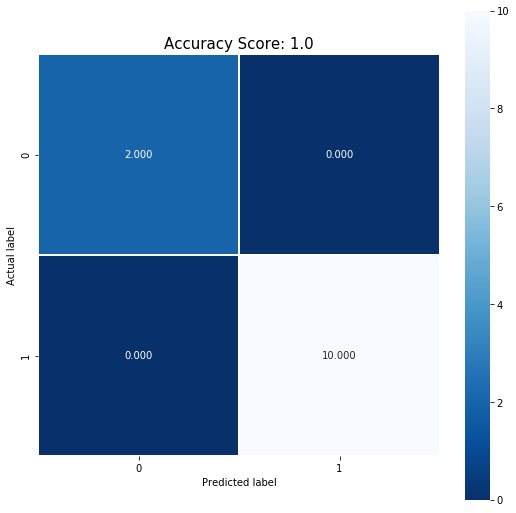

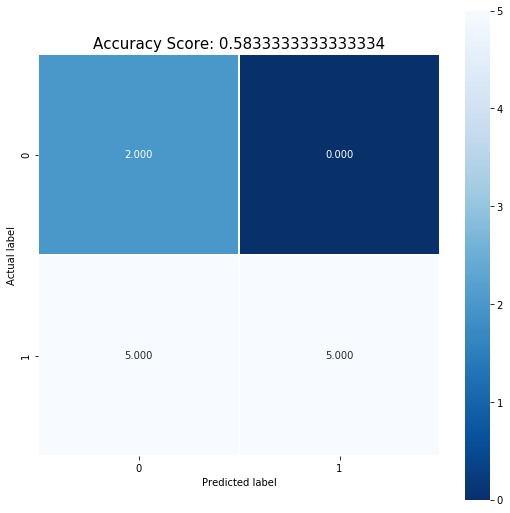

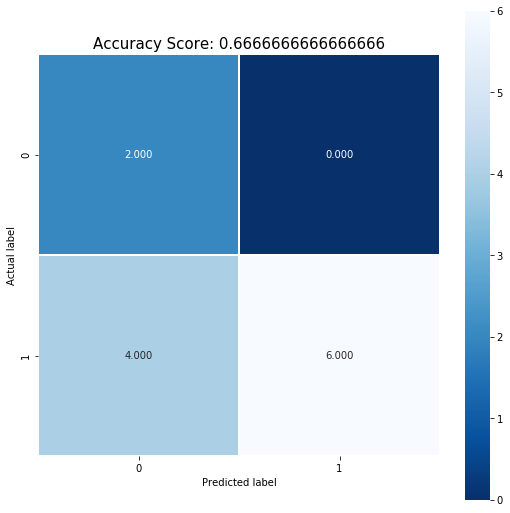

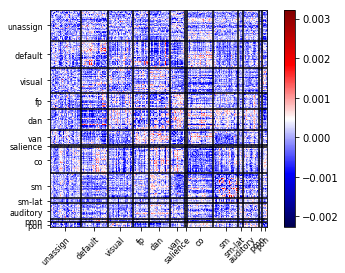

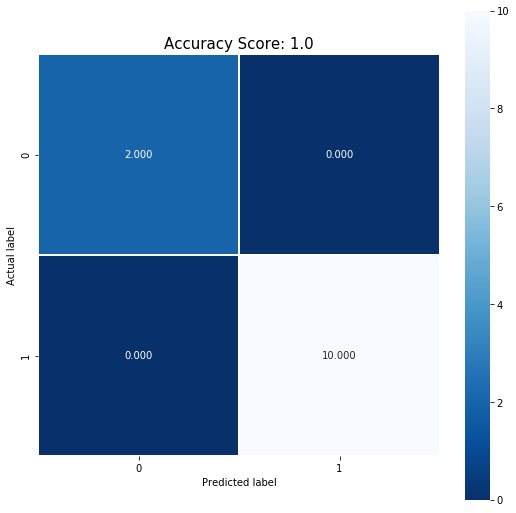

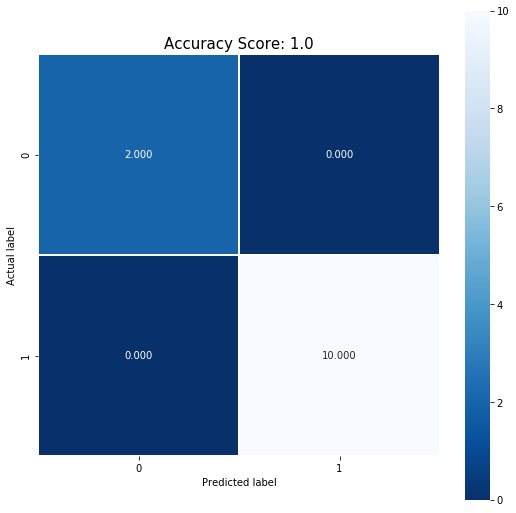

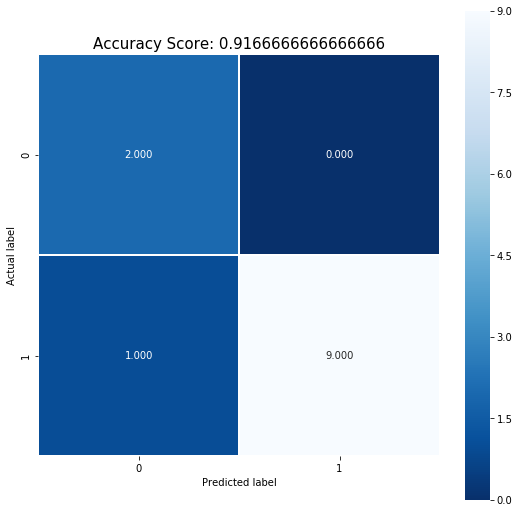

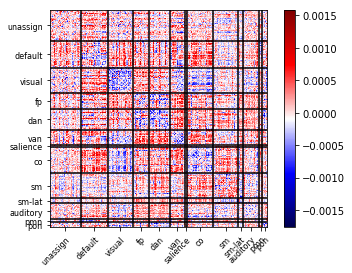

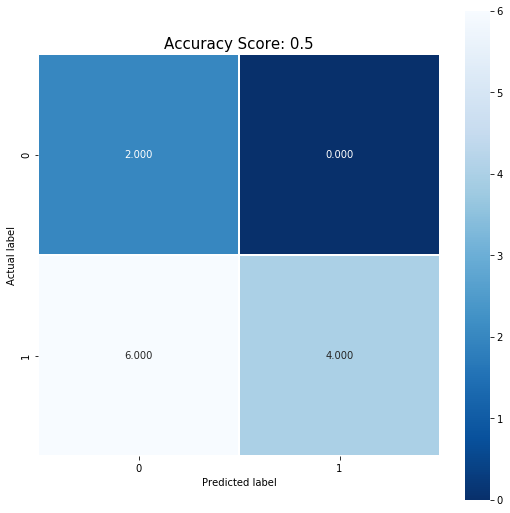

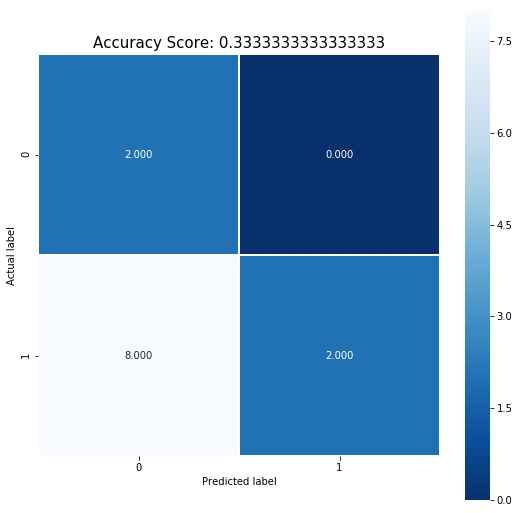

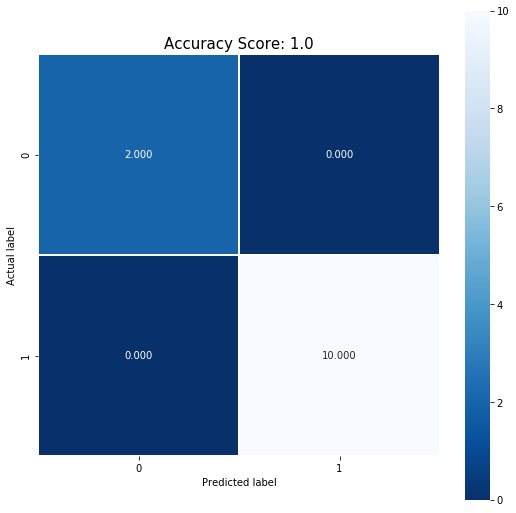

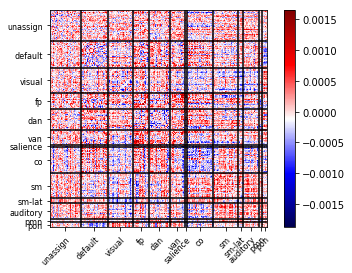

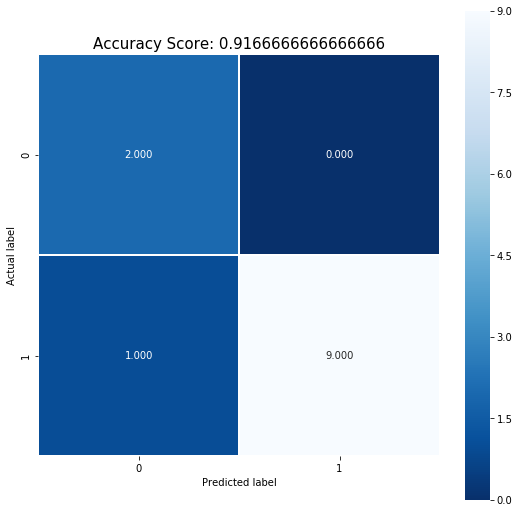

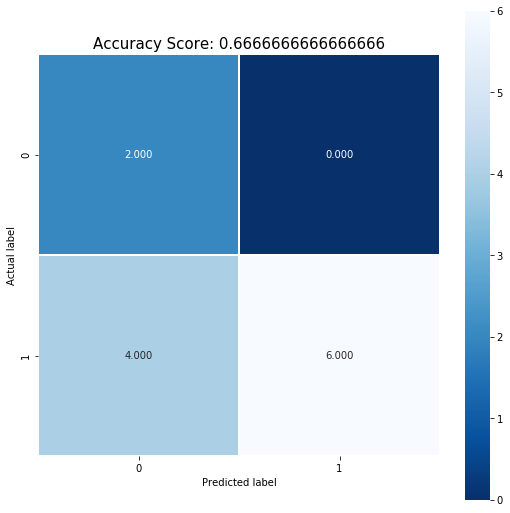

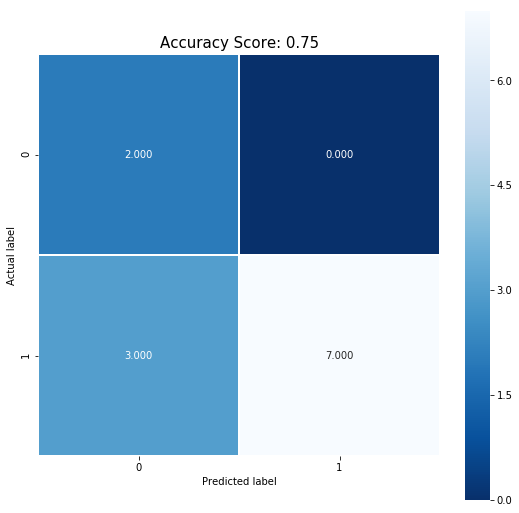

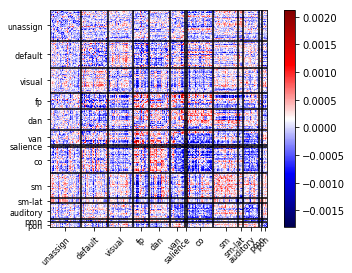

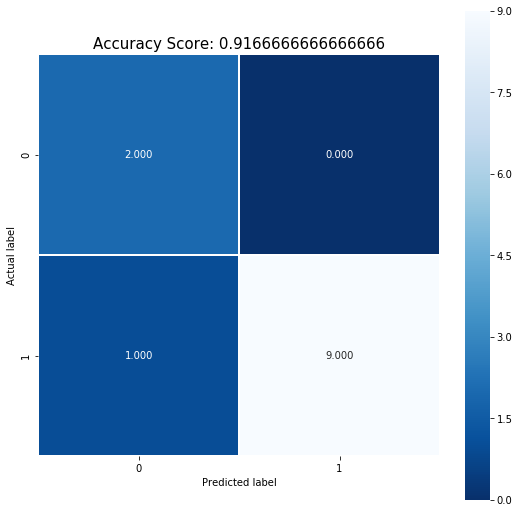

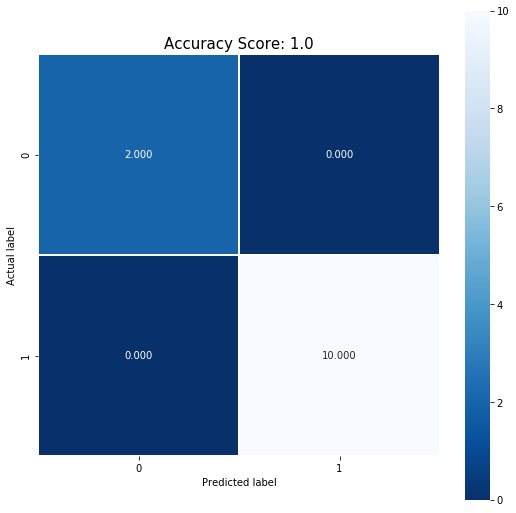

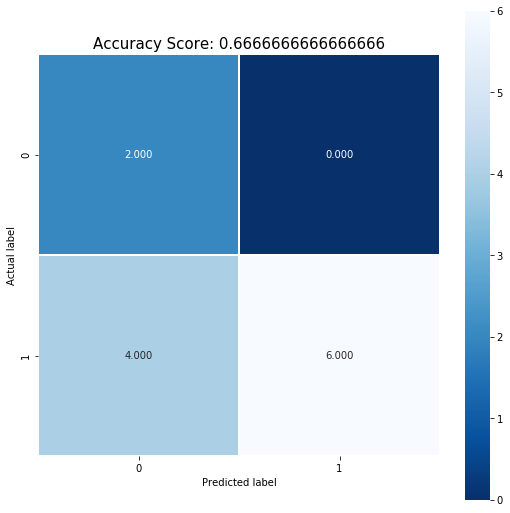

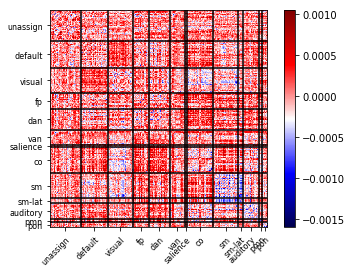

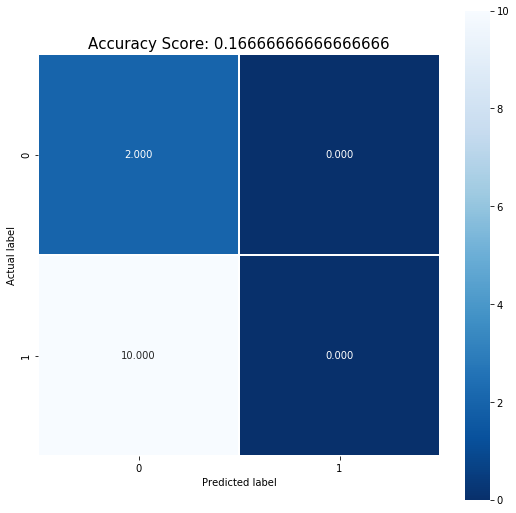

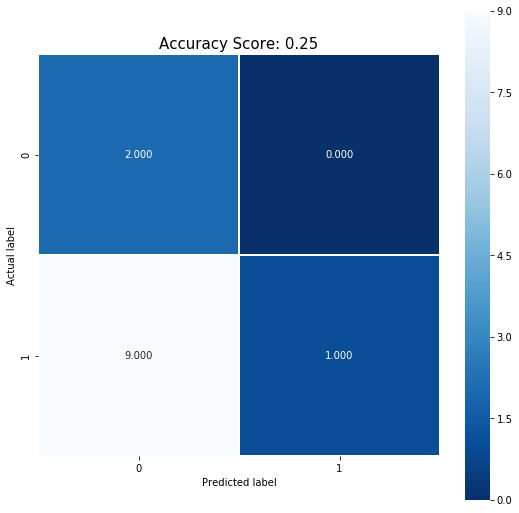

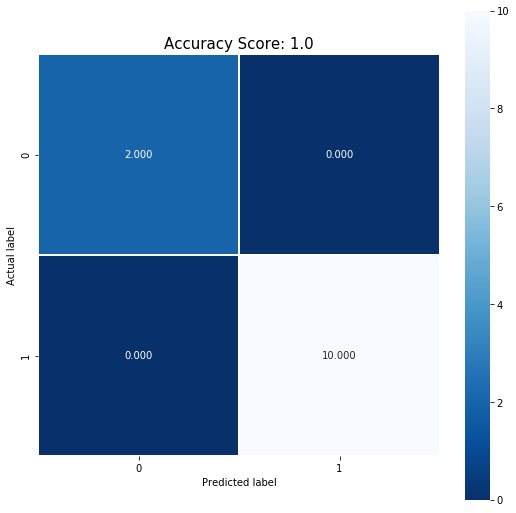

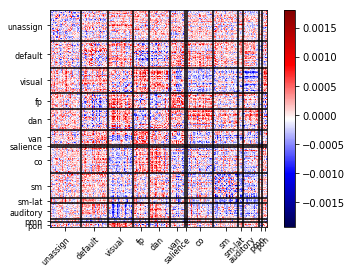

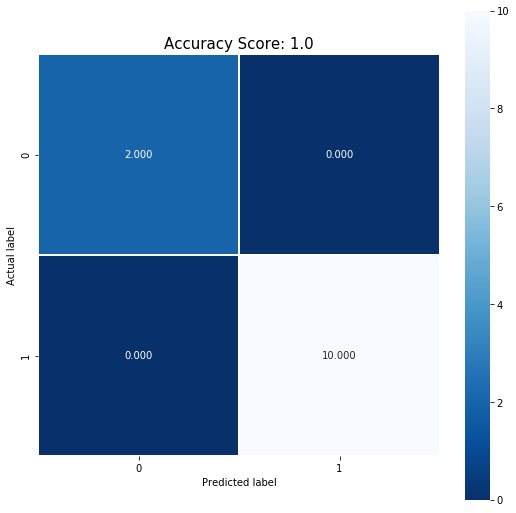

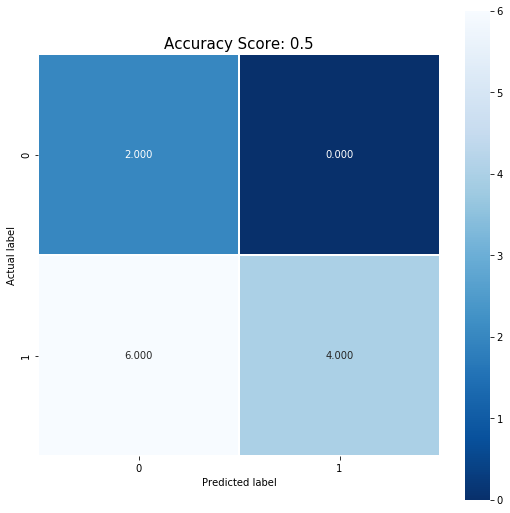

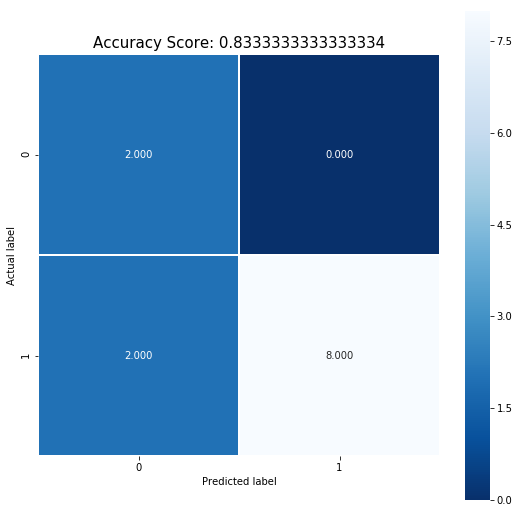

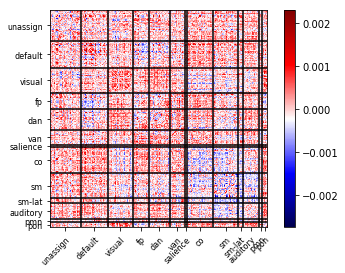

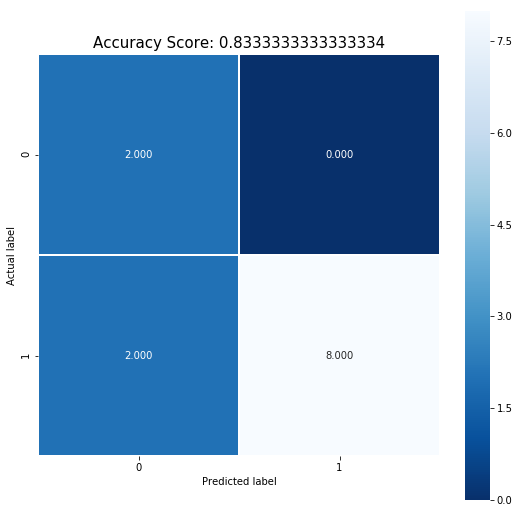

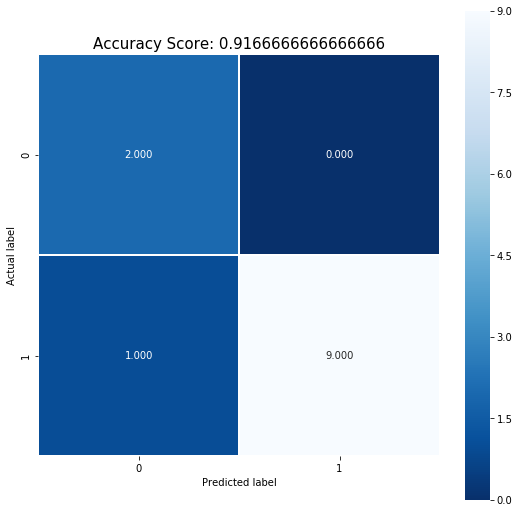

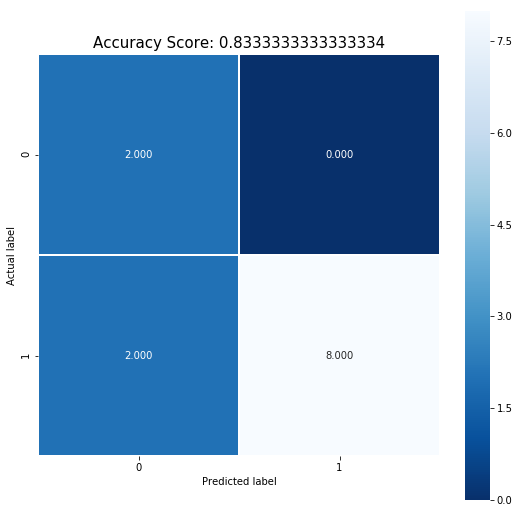

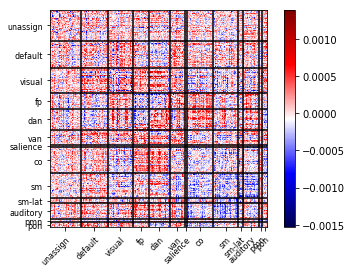

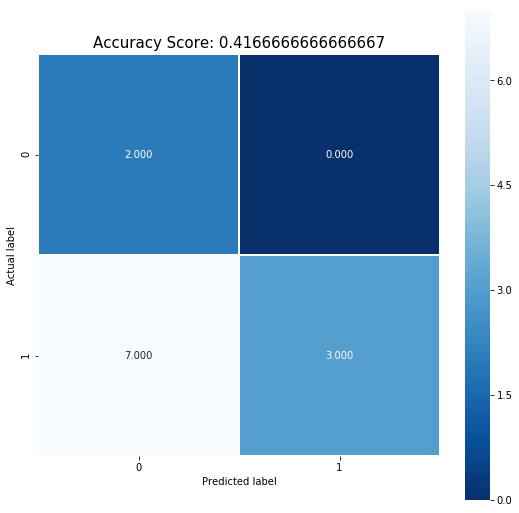

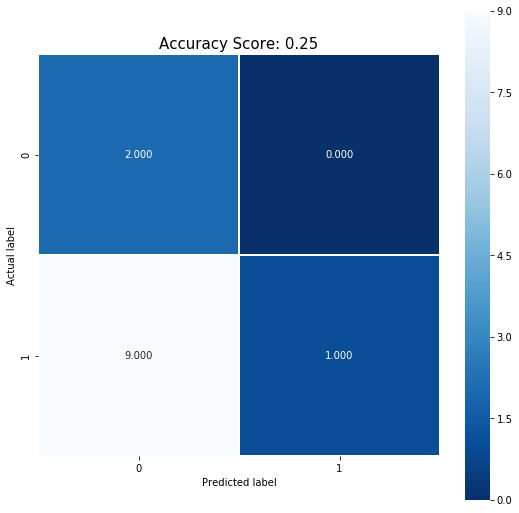

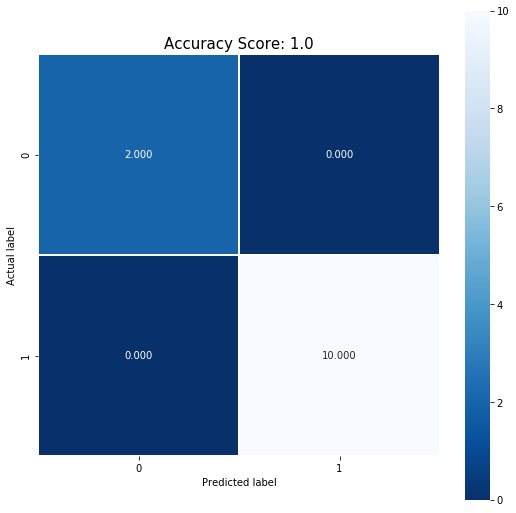

In [5]:
subs=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
for sub in subs:
    svcSS(sub)

In [1]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
import numpy as np
import reshape
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
trainList=['MSC01','MSC02','MSC03']
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
clf = LinearSVC()
cvTable=[]
accTable=[]
for i in trainList:
        #Load task FC
    #taskFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/mem/' +i+ '_parcel_corrmat.mat')
    taskFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/mem/' +i+ '_parcel_corrmat.mat')
    #Load rest
    #restFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/' +i+ '_parcel_corrmat.mat')
    restFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/' +i+ '_parcel_corrmat.mat')
    #Create a training dataset targets 1/0 ==task/rest, chunk=#days
    x_train=np.concatenate((taskFC, restFC))
    taskSize=taskFC.shape[0]
    restSize=restFC.shape[0]
    t = np.ones(taskSize, dtype = int)
    r=np.zeros(restSize, dtype=int)
    y_train = np.concatenate((t,r))
    clf.fit(x_train, y_train)
        #Cross validation 10 fold (size of task dataset)
    CVscores=cross_val_score(clf, x_train, y_train, cv=taskSize)
    cv_tmp_df=pd.DataFrame({i:CVscores})
    cvTable.append(cv_tmp_df)
cvTable=pd.concat(cvTable, axis=1)

In [16]:
from sklearn.model_selection import cross_validate
score=cross_validate(clf, x_train, y_train, cv=taskSize, return_estimator=True)

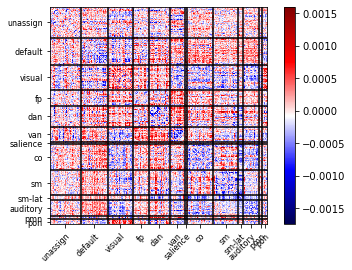

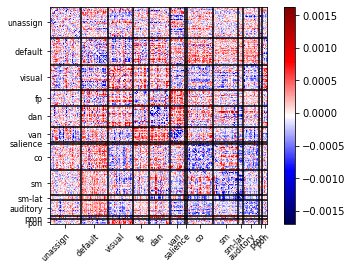

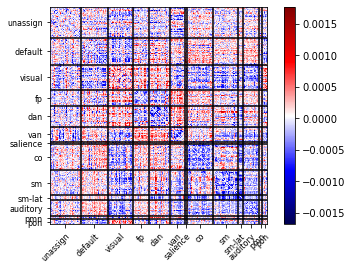

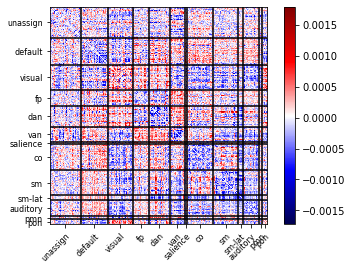

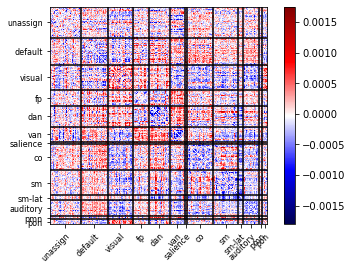

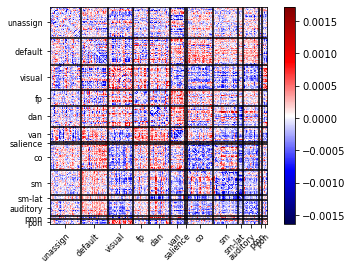

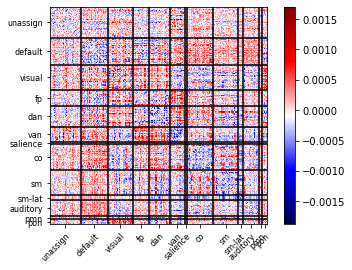

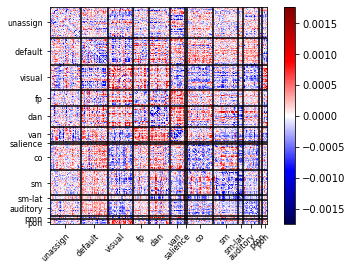

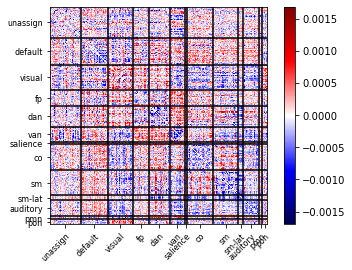

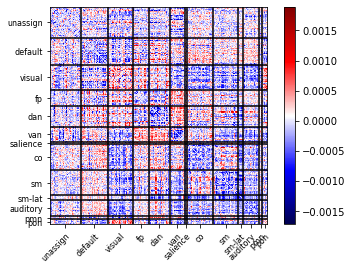

In [17]:
    
def loadParcelParams(roiset,datadir):
    """ This function loads information about the ROIs and networks.
    For now, this is only set up to work with 333 Gordon 2014 Cerebral Cortex regions
    Inputs:
    roiset = string naming roi type to get parameters for (e.g. 'Gordon333')
    datadir = string path to the location where ROI files are stored
    Returns:
    Parcel_params: a dictionary with ROI information stored in it
    """
    import scipy.io as spio
    #initialize a dictionary where info will be stored
    Parcel_params = {}

    # put some info into the dict that will work for all roi sets
    Parcel_params['roiset'] = roiset
    dataIn_types = {'dmat','mods_array','roi_sort','net_colors'}
    for dI in dataIn_types:
          dataIn = spio.loadmat(datadir + roiset + '_' + dI + '.mat')
          Parcel_params[dI] = np.array(dataIn[dI])
    Parcel_params['roi_sort'] = Parcel_params['roi_sort'] - 1 #orig indexing in matlab, need to subtract 1
    
    #transition points and centers for plotting
    transitions,centers = compute_trans_centers(Parcel_params['mods_array'],Parcel_params['roi_sort'])
    Parcel_params['transitions'] = transitions
    Parcel_params['centers'] = centers

    # some ROI specific info that needs to be added by hand
    # add to this if you have a new ROI set that you're using
    if roiset == 'Gordon333':
        Parcel_params['dist_thresh'] = 20 #exclusion distance to not consider in metrics
        Parcel_params['num_rois'] = 333
        Parcel_params['networks'] = ['unassign','default','visual','fp','dan','van','salience',
                                         'co','sm','sm-lat','auditory','pmn','pon']
    else:
        raise ValueError("roiset input is recognized.")

    return Parcel_params
def compute_trans_centers(mods_array,roi_sort):
    """ Function that computes transitions and centers of networks for plotting names
    Inputs:
    mods_array: a numpy vector with the network assignment for each ROI (indexed as a number)
    roi_sort: ROI sorting ordered to show each network in sequence
    Returns:
    transitions: a vector with transition points between networks
    centers: a vector with center points for each network
    """

    mods_sorted = np.squeeze(mods_array[roi_sort])
    transitions = np.nonzero((np.diff(mods_sorted,axis=0)))[0]+1 #transition happens 1 after

    trans_plusends = np.hstack((0,transitions,mods_array.size)) #add ends
    centers = trans_plusends[:-1] + ((trans_plusends[1:] - trans_plusends[:-1])/2)

    return transitions,centers

def figure_corrmat(corrmat,Parcel_params, clims=(-1,1)):
    """ This function will make a nice looking plot of a correlation matrix for a given parcellation, 
    labeling and demarkating networks.
    Inputs:
    corrmat: an roi X roi matrix for plotting
    Parcel_params: a dictionary with ROI information
    clims: (optional) limits to place on corrmat colormap
    Returns:
    fig: a figure handle for figure that was made
    """

    # some variables for ease
    roi_sort = np.squeeze(Parcel_params['roi_sort'])

    # main figure plotting
    fig, ax = plt.subplots()
    im = ax.imshow(corrmat[roi_sort,:][:,roi_sort],cmap='seismic',vmin=clims[0],vmax=clims[1], interpolation='none')
    plt.colorbar(im)

    # add some lines between networks
    for tr in Parcel_params['transitions']:
        ax.axhline(tr,0,Parcel_params['num_rois'],color='k')
        ax.axvline(tr,0,Parcel_params['num_rois'],color='k')

    # alter how the tick marks are shown to plot network names
    ax.set_xticks(Parcel_params['centers'])
    ax.set_yticks(Parcel_params['centers'])
    ax.set_xticklabels(Parcel_params['networks'],fontsize=8)
    ax.set_yticklabels(Parcel_params['networks'],fontsize=8)
    plt.setp(ax.get_xticklabels(), rotation = 45, ha = 'right', rotation_mode = 'anchor')

    plt.show()

    return fig
for model in score['estimator']:
    i=model.coef_
    nrois=333
    ds=np.zeros((nrois, nrois))
    ds[np.triu_indices(ds.shape[0], k = 1)] = i
    ds = ds + ds.T
    #get atlas you want to use
    Parcel_params = loadParcelParams('Gordon333','/Users/Alexis/Desktop/MSC_Alexis/analysis/data/Parcel_info/')
    #make pretty fig
    vmin=np.amin(ds)
    vmax=np.amax(ds)
    fig = figure_corrmat(ds,Parcel_params, clims=(vmin,vmax))

In [18]:
ds=np.empty([10,55278])
count=0
for model in score['estimator']:
    i=model.coef_
    ds[count]=i
    count=count+1


In [19]:
ds.shape

(10, 55278)

In [10]:
fwSD=np.std(ds, axis=0)

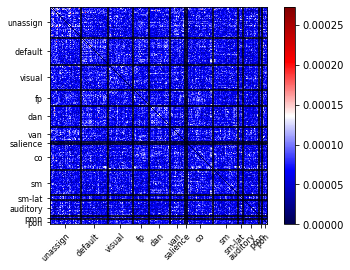

In [34]:
nrois=333
ds=np.zeros((nrois, nrois))
ds[np.triu_indices(ds.shape[0], k = 1)] = fwSD
ds = ds + ds.T
    #get atlas you want to use
Parcel_params = loadParcelParams('Gordon333','/Users/Alexis/Desktop/MSC_Alexis/analysis/data/Parcel_info/')
    #make pretty fig
vmin=np.amin(ds)
vmax=np.amax(ds)
fig = figure_corrmat(ds,Parcel_params, clims=(vmin, vmax))

In [12]:
fwSD.shape

(55278,)